In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
main_df = pd.read_csv('data/train.csv')
main_df.shape

(8693, 14)

In [131]:
main_df.head(26)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- Destination - The planet the passenger will be debarking to.

- Age - The age of the passenger.

- VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, 

- VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- Name - The first and last names of the passenger.

- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [132]:
test_df = pd.read_csv("data/test.csv")
test_df.head(26)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [133]:
main_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


- Shape was (8693,14) so we have some missing values

In [134]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [135]:
# How many people were transported
main_df["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

<Axes: xlabel='Transported'>

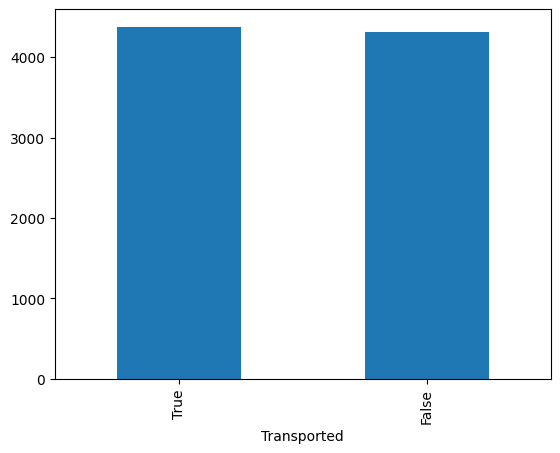

In [136]:
# Plot value counts
main_df["Transported"].value_counts().plot(kind="bar")

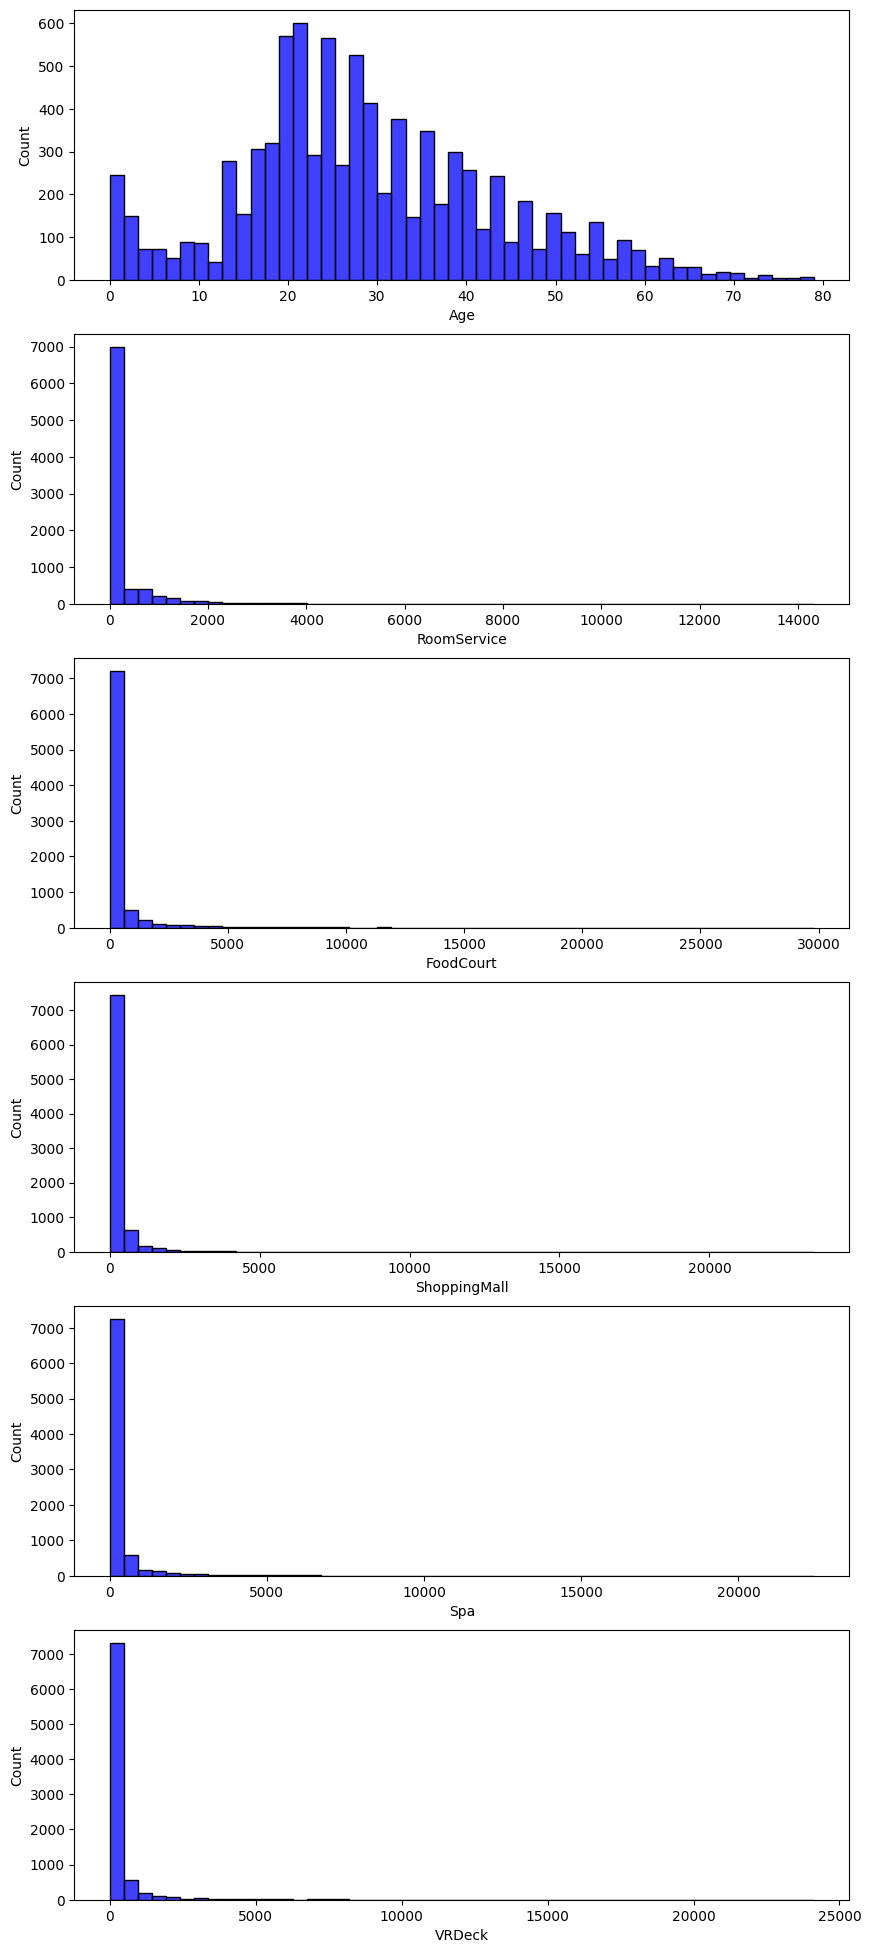

In [137]:
# Histograms
fig, ax = plt.subplots(6,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(main_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(main_df['RoomService'], color='b', bins=50, ax=ax[1]);
sns.histplot(main_df['FoodCourt'], color='b', bins=50, ax=ax[2]);
sns.histplot(main_df['ShoppingMall'], color='b', bins=50, ax=ax[3]);
sns.histplot(main_df['Spa'], color='b', bins=50, ax=ax[4]);
sns.histplot(main_df['VRDeck'], color='b', bins=50, ax=ax[5]);

Prepare dataset for training

In [138]:
# Drop Id and name as they are not necessary
train_df = main_df.copy()
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
train_df.head(26)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [139]:
# Check the number of nulls
train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [140]:
test_df.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [141]:
# To deal with the nulls we will replace them with a 0
train_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train_df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [142]:
test_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
test_df.isnull().sum().sort_values(ascending=False)

Cabin           100
Destination      92
Age              91
HomePlanet       87
RoomService      82
PassengerId       0
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [143]:
# Now we will transform booleans to ints 0 = False, 1 = True
train_df["Transported"] = train_df["Transported"].astype(int)
train_df["VIP"] = train_df["VIP"].astype(int)
train_df["CryoSleep"] = train_df["CryoSleep"].astype(int)

In [144]:
test_df["VIP"] = test_df["VIP"].astype(int)
test_df["CryoSleep"] = test_df["CryoSleep"].astype(int)

In [145]:
train_df.head(26)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
5,0005_01,Earth,0,F/0/P,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.0,1
6,0006_01,Earth,0,F/2/S,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,0.0,0.0,1
7,0006_02,Earth,1,G/0/S,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,0.0,0.0,1
8,0007_01,Earth,0,F/3/S,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,216.0,0.0,1
9,0008_01,Europa,1,B/1/P,55 Cancri e,14.0,0,0.0,0.0,0.0,0.0,0.0,1


In [146]:
# Cabin is a string consisting of Deck/Cabin_num/Side so we will separate them in 3 columns
train_df[["Deck", "Cabin_num", "Side"]] = train_df["Cabin"].str.split("/", expand=True)

In [147]:
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)

# EDA

Text(0.5, 0, 'Age (years)')

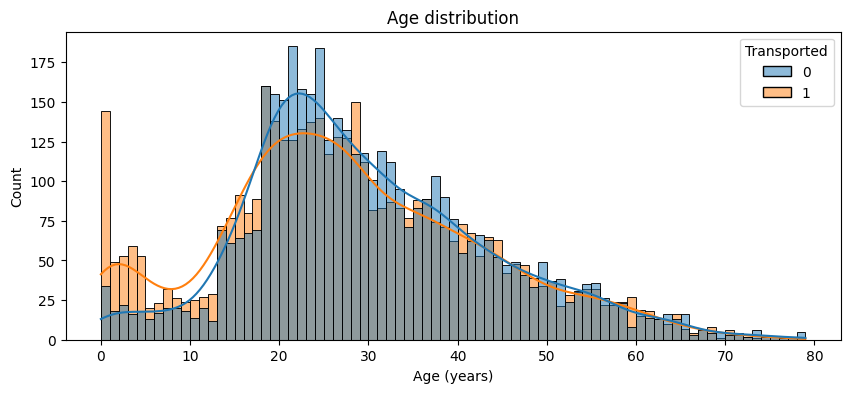

In [148]:
# Lets plot the Transported per age
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train_df, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

- 0-18 year olds were more likely to be transported than not.
- 18-25 year olds were less likely to be transported than not.
- Over 25 year olds were about equally likely to be transported than not.

In [149]:
# Lets create a new feature for this 3 groups

# Function to assign AgeGroup based on age
def assign_age_group(age):
    if age == 0:
        return 0
    elif 1 <= age <= 18:
        return 1
    elif 19 <= age <= 25:
        return 2
    else:
        return 3

# Apply the function to create the new AgeGroup column
train_df['AgeGroup'] = train_df['Age'].apply(assign_age_group)

In [150]:
test_df['AgeGroup'] = test_df['Age'].apply(assign_age_group)

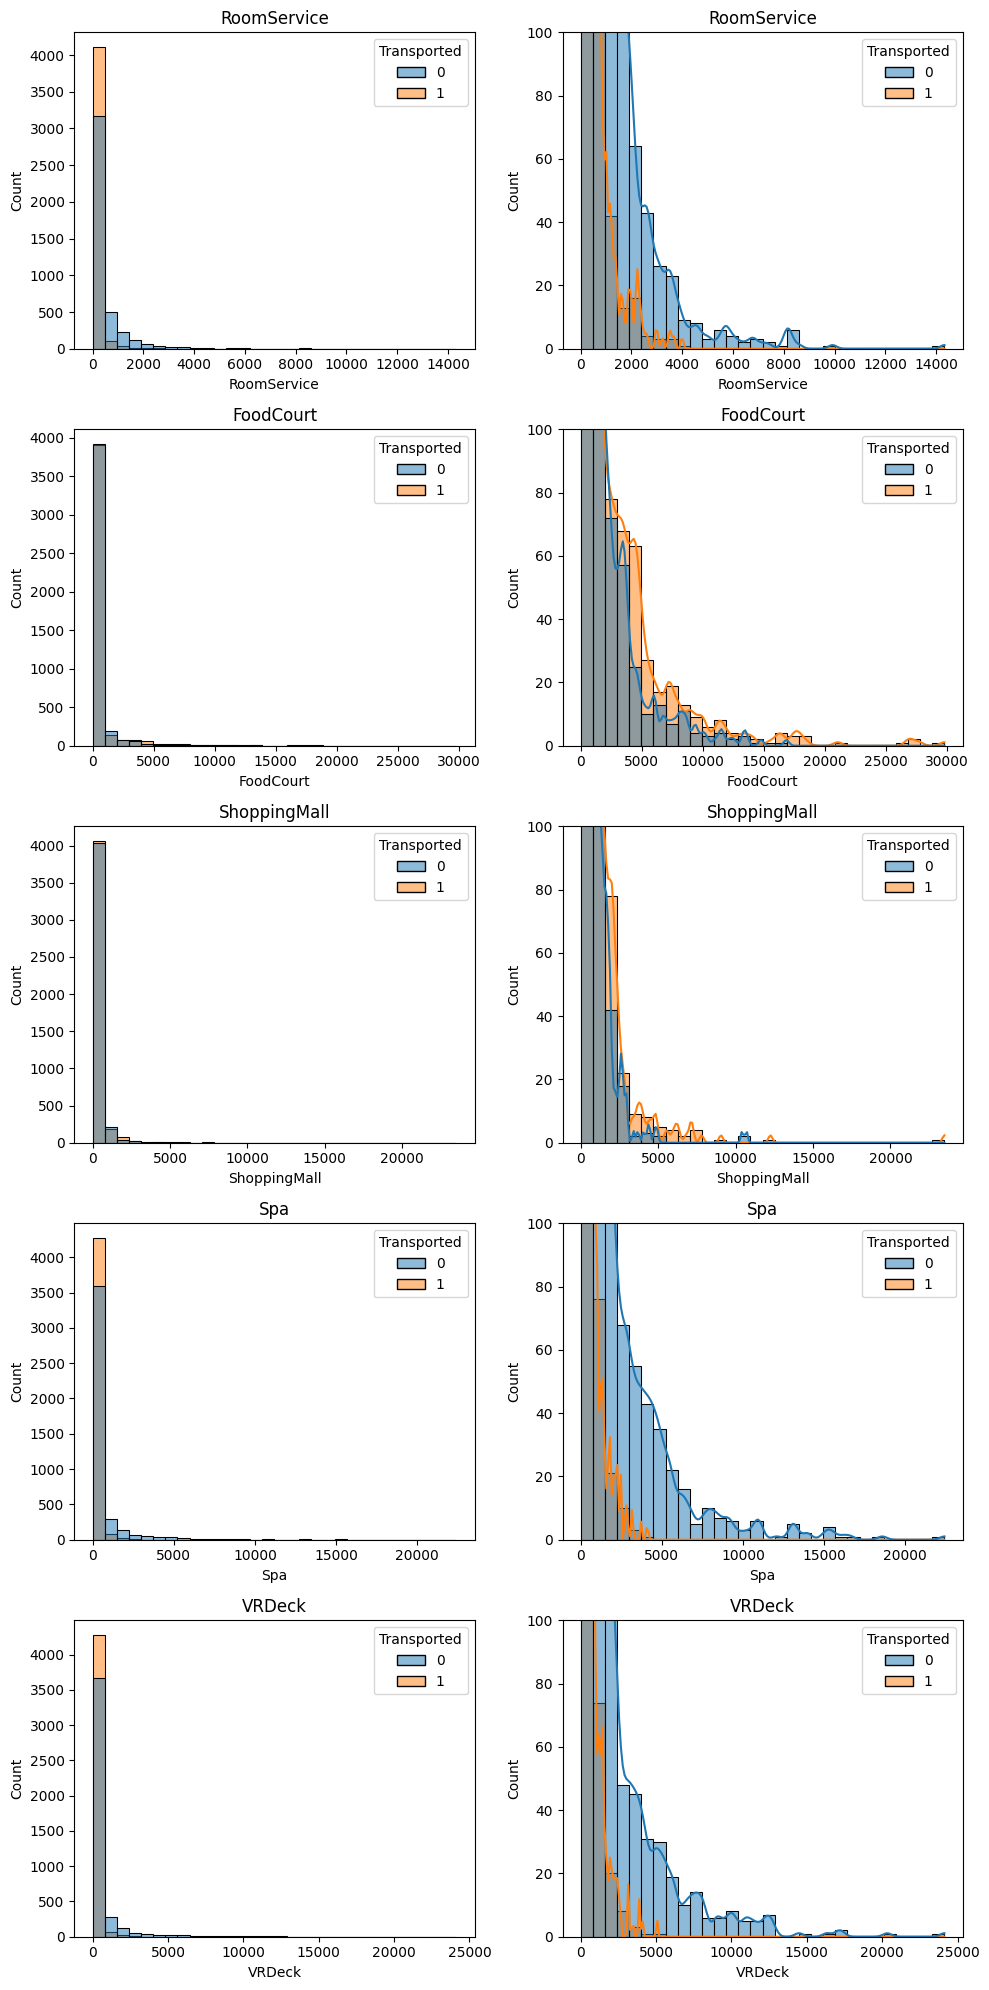

In [151]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

- People who were transported tended to spend less.
- Create a new feature that tracks the total expenditure across all 5 amenities.
- Create a binary feature to indicate if the person has not spent anything. (i.e. total expenditure is 0).
- Take the log transform to reduce skew.

In [152]:
# Lets track total amount of expenditure
train_df["TotalExpenditure"] = train_df["RoomService"] + train_df["FoodCourt"] + train_df["ShoppingMall"] + train_df["Spa"] + train_df["VRDeck"]
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,AgeGroup,TotalExpenditure
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,3,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,2,736.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,3,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,3,5176.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1,1091.0


In [153]:
test_df["TotalExpenditure"] = test_df["RoomService"] + test_df["FoodCourt"] + test_df["ShoppingMall"] + test_df["Spa"] + test_df["VRDeck"]
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side,AgeGroup,TotalExpenditure
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,G,3,S,3,0.0
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,4,S,2,2832.0
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,C,0,S,3,0.0
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,C,1,S,3,7418.0
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,F,5,S,2,645.0


Text(0.5, 0, 'Expenditure ($)')

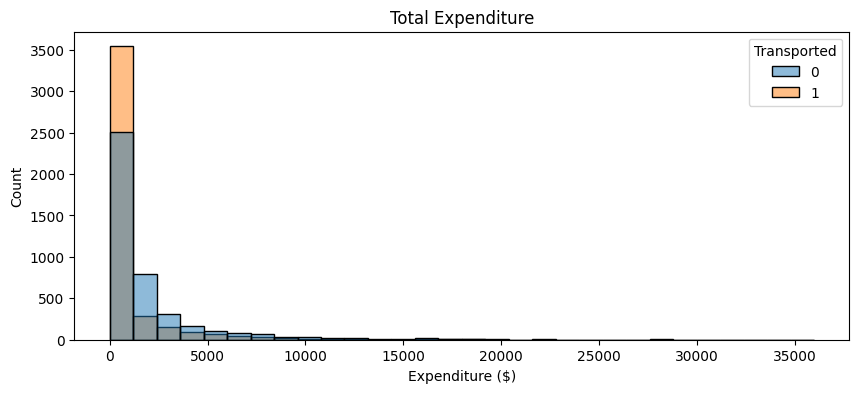

In [154]:
# Lets plot the Transported per Total Expenditure
plt.figure(figsize=(10,4))

# Histogram

sns.histplot(data=train_df, x="TotalExpenditure", bins=30, kde=False, hue='Transported')
# Aesthetics
plt.title('Total Expenditure')
plt.xlabel('Expenditure ($)')

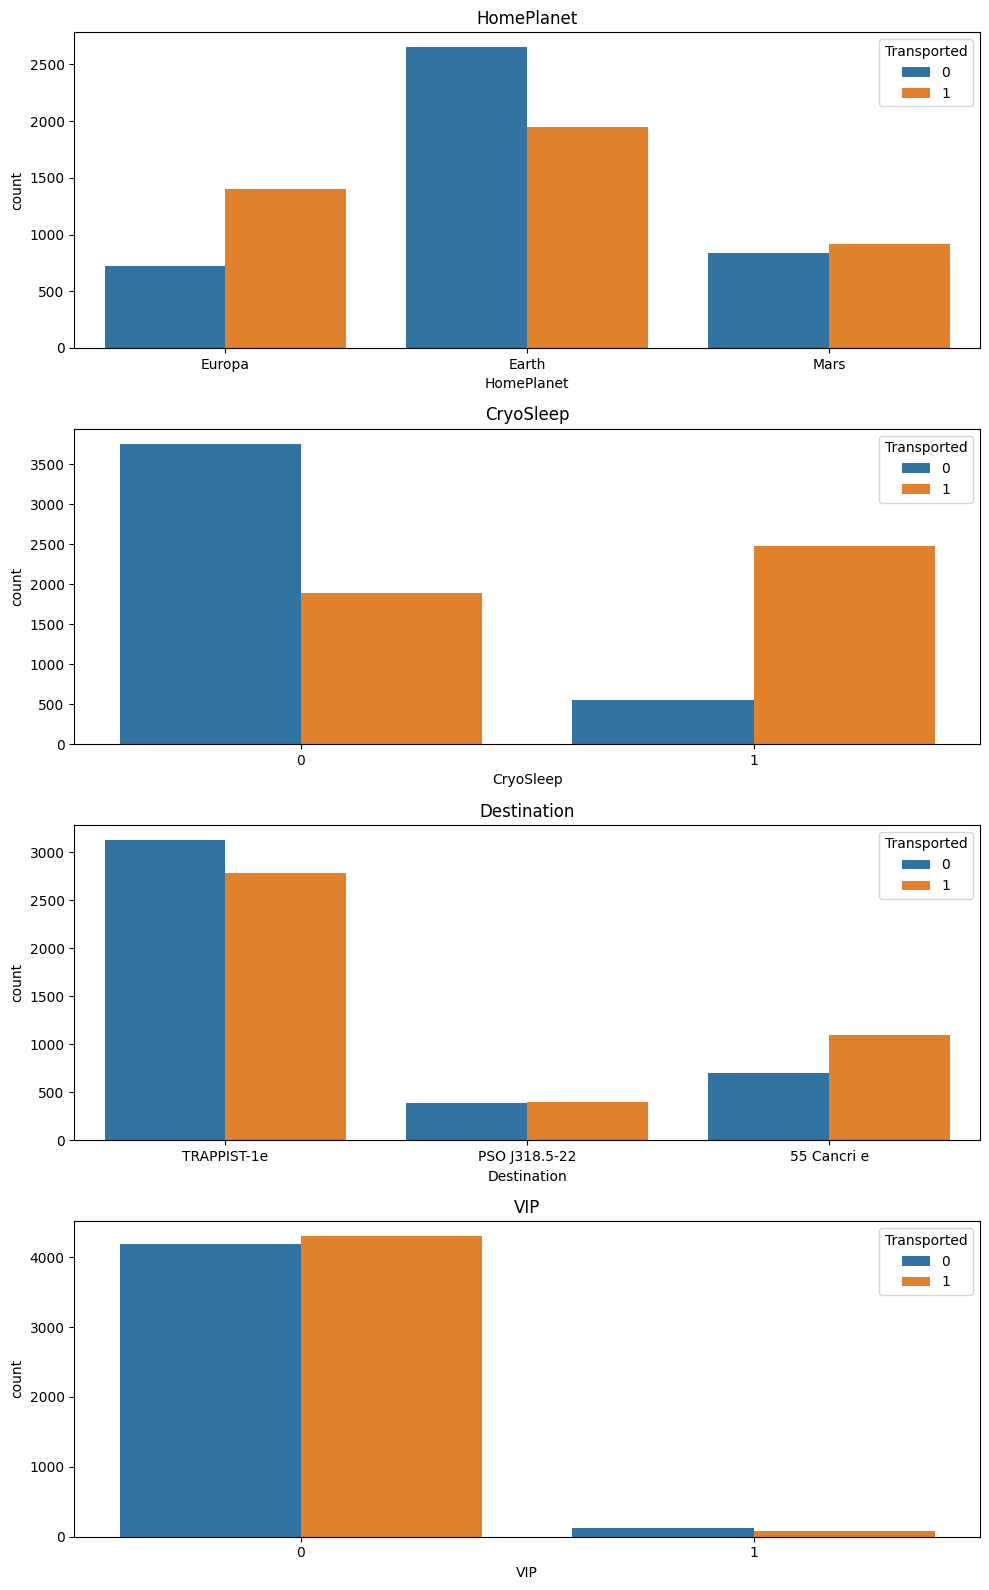

In [155]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

- VIP does not appear to be a useful feature; the target split is more or less equal.
- CryoSleep appears the be a very useful feature in contrast.
- We might consider dropping the VIP column to prevent overfitting.

In [156]:
train_df = train_df.drop("VIP", axis=1)
train_df = train_df.drop("Cabin", axis=1)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,AgeGroup,TotalExpenditure
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,3,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,2,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,3,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,3,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1,1091.0


In [157]:
test_df = test_df.drop("VIP", axis=1)
test_df = test_df.drop("Cabin", axis=1)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side,AgeGroup,TotalExpenditure
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,G,3,S,3,0.0
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0.0,9.0,0.0,2823.0,0.0,F,4,S,2,2832.0
2,0019_01,Europa,1,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,C,0,S,3,0.0
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0.0,6652.0,0.0,181.0,585.0,C,1,S,3,7418.0
4,0023_01,Earth,0,TRAPPIST-1e,20.0,10.0,0.0,635.0,0.0,0.0,F,5,S,2,645.0


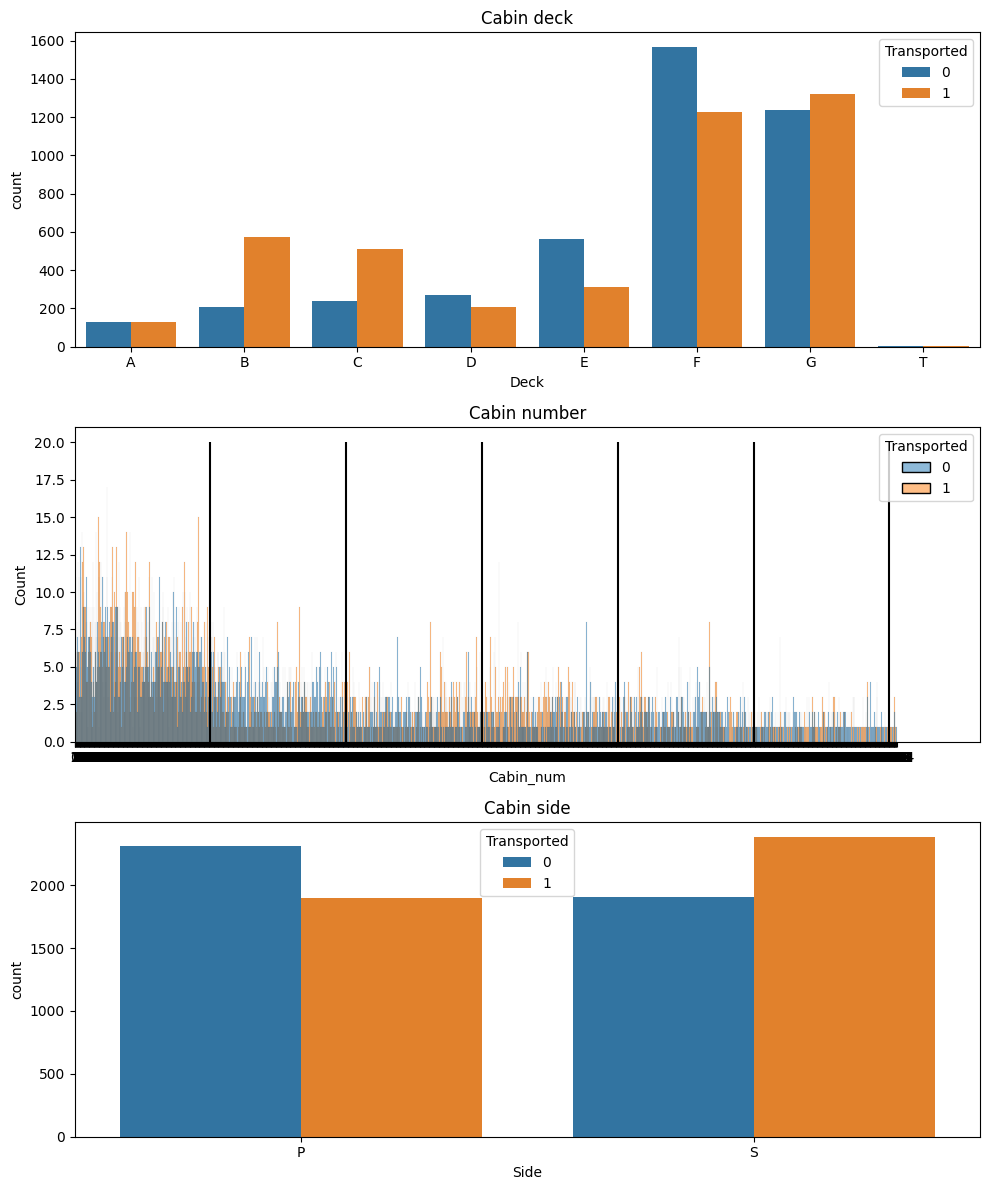

In [158]:
# Lets now work with cabins

# Plot distribution of deck
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='Deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

# Plot distribution of Cabin_num
plt.subplot(3,1,2)
sns.histplot(data=train_df, x='Cabin_num', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=20, color='black')
plt.vlines(600, ymin=0, ymax=20, color='black')
plt.vlines(900, ymin=0, ymax=20, color='black')
plt.vlines(1200, ymin=0, ymax=20, color='black')
plt.vlines(1500, ymin=0, ymax=20, color='black')
plt.vlines(1800, ymin=0, ymax=20, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

# Plot distribution of Side
plt.subplot(3,1,3)
sns.countplot(data=train_df, x='Side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

We explore now what to do with missing values

In [159]:
# Columns with missing values
na_cols=train_df.columns[train_df.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(train_df[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_df),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
Destination,182,2.09
Age,179,2.06
RoomService,181,2.08
Deck,199,2.29
Cabin_num,199,2.29
Side,199,2.29
TotalExpenditure,181,2.08


Text(0.5, 1.0, 'Heatmap of missing values')

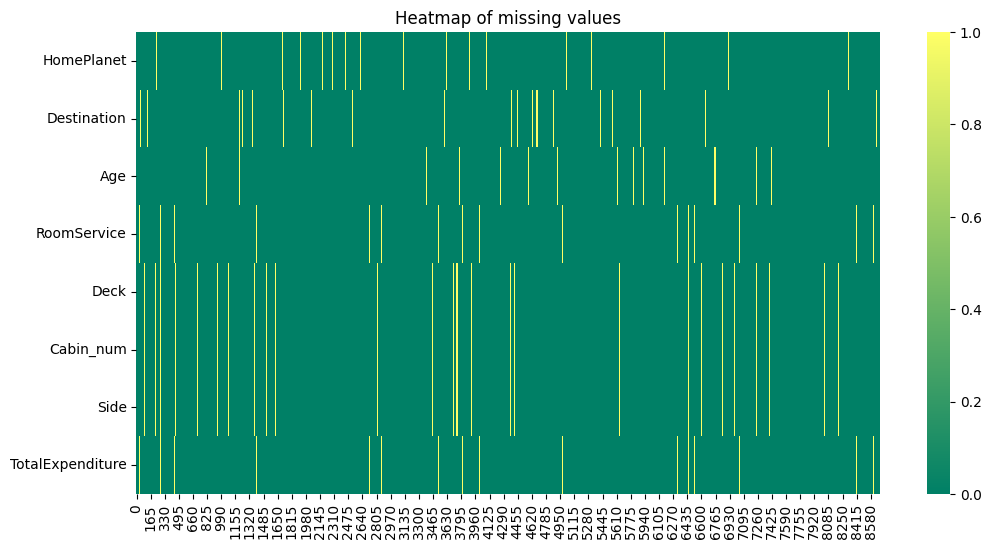

In [160]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(train_df[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

Missing values make up about 2% of the data, which is a relatively small amount. For the most part, they don't seem to be happening at the same time (except the features made from splitting Cabin and Name), but let's inspect closer.

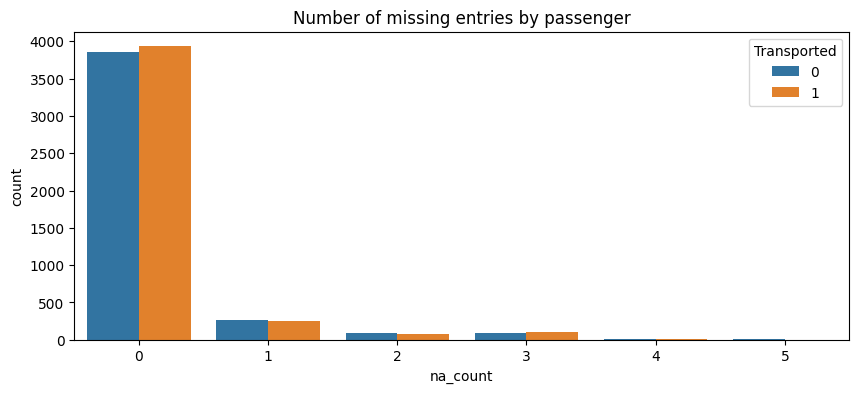

In [161]:
# Countplot of number of missing values by passenger
train_df['na_count']=train_df.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train_df.drop('na_count', axis=1, inplace=True)

- Missing values are independent of the target and for the most part are isolated.
- Even though only 2% of the data is missing, about 25% of all passengers have at least 1 missing value.
- PassengerId is the only (original) feature to not have any missing values.

- Since most of the missing values are isolated it makes sense to try to fill these in as opposed to just dropping rows.
- If there is a relationship between PassengerId and other features we can fill missing values according to this column.

The easiest way to deal with missing values is to just use the median for continuous features and the mode for categorical features. 
This will work 'well enough' but if we want to maximise the accuracy of our models then we need to look for patterns within the missing data. The way to do this is by looking at the joint distribution of features.

<Axes: xlabel='Deck', ylabel='HomePlanet'>

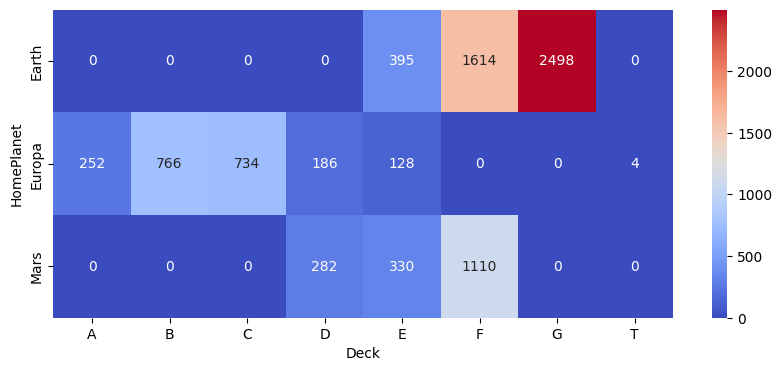

In [162]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=train_df.groupby(['Deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

- Passengers on decks A, B, C or T came from Europa.
- Passengers on deck G came from Earth.
- Passengers on decks D, E or F came from multiple planets.

In [163]:
# Missing values before
HP_bef=train_df['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
train_df.loc[(train_df['HomePlanet'].isna()) & (train_df['Deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
train_df.loc[(train_df['HomePlanet'].isna()) & (train_df['Deck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',train_df['HomePlanet'].isna().sum())

#HomePlanet missing values before: 201
#HomePlanet missing values after: 109


In [164]:
# Missing values before
test_HP_bef=test_df['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
test_df.loc[(test_df['HomePlanet'].isna()) & (test_df['Deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
test_df.loc[(train_df['HomePlanet'].isna()) & (test_df['Deck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#TEST HomePlanet missing values before:',test_HP_bef)
print('#TEST HomePlanet missing values after:',test_df['HomePlanet'].isna().sum())

#TEST HomePlanet missing values before: 87
#TEST HomePlanet missing values after: 71


<Axes: xlabel='Destination', ylabel='HomePlanet'>

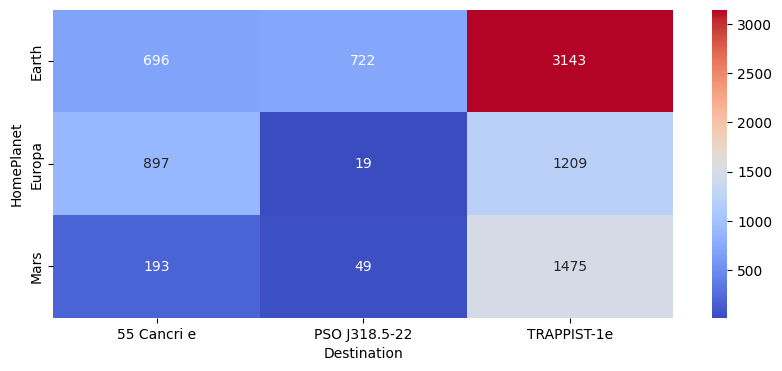

In [165]:
# Joint distribution of CabinDeck and HomePlanet
DHP_gb=train_df.groupby(['Destination','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(DHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

Most people heading towards TRAPPIST-1e came from Earth so it makes sense to guess they came from there. But remember from earlier, no one on deck D came from Earth so we need to filter these out.

In [166]:
# Missing values before
HP_bef=train_df['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
train_df.loc[(train_df['HomePlanet'].isna()) & ~(train_df['Deck']=='D'), 'HomePlanet']='Earth'
train_df.loc[(train_df['HomePlanet'].isna()) & (train_df['Deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',train_df['HomePlanet'].isna().sum())

#HomePlanet missing values before: 109
#HomePlanet missing values after: 0


In [167]:
# Missing values before
test_HP_bef=test_df['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
test_df.loc[(test_df['HomePlanet'].isna()) & ~(test_df['Deck']=='D'), 'HomePlanet']='Earth'
test_df.loc[(test_df['HomePlanet'].isna()) & (test_df['Deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#TEST HomePlanet missing values before:',test_HP_bef)
print('#TEST HomePlanet missing values after:',test_df['HomePlanet'].isna().sum())

#TEST HomePlanet missing values before: 71
#TEST HomePlanet missing values after: 0


Since the majority (68%) of passengers are heading towards TRAPPIST-1e (see EDA section), we'll just impute this value (i.e. the mode). A better rule hasn't been found at this stage.

In [168]:
# Missing values before
D_bef=train_df['Destination'].isna().sum()

# Fill missing Destination values with mode
train_df.loc[(train_df['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',train_df['Destination'].isna().sum())

#Destination missing values before: 182
#Destination missing values after: 0


In [169]:
# Missing values before
test_D_bef=test_df['Destination'].isna().sum()

# Fill missing Destination values with mode
test_df.loc[(test_df['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',test_D_bef)
print('#Destination missing values after:',test_df['Destination'].isna().sum())

#Destination missing values before: 92
#Destination missing values after: 0


In [170]:
# Joint distribution of deck, Destination and homeplanet
train_df.groupby(['HomePlanet','Destination','Deck'])['Deck'].size().unstack().fillna(0)

Deck                          A      B      C      D      E       F       G  \
HomePlanet Destination                                                        
Earth      55 Cancri e      0.0    0.0    0.0    0.0   50.0   275.0   365.0   
           PSO J318.5-22    0.0    0.0    0.0    0.0   29.0   221.0   461.0   
           TRAPPIST-1e      0.0    0.0    0.0    0.0  339.0  1188.0  1733.0   
Europa     55 Cancri e    108.0  333.0  317.0   62.0   45.0     0.0     0.0   
           PSO J318.5-22    2.0    3.0   13.0    0.0    0.0     0.0     0.0   
           TRAPPIST-1e    146.0  443.0  417.0  124.0   83.0     0.0     0.0   
Mars       55 Cancri e      0.0    0.0    0.0   51.0   21.0   123.0     0.0   
           PSO J318.5-22    0.0    0.0    0.0   17.0   12.0    20.0     0.0   
           TRAPPIST-1e      0.0    0.0    0.0  224.0  297.0   967.0     0.0   

Deck                        T  
HomePlanet Destination         
Earth      55 Cancri e    0.0  
           PSO J318.5-22  0.0  
           TRAPPIST-1e    0.0  
Europa     55 Cancri e    0.0  
           PSO J318.5-22  0.0  
           TRAPPIST-1e    5.0  
Mars       55 Cancri e    0.0  
           PSO J318.5-22  0.0  
           TRAPPIST-1e    0.0

- Passengers from Mars are most likely in deck F.
- Passengers from Europa are (more or less) most likely in deck C and deck B otherwise.
- Passengers from Earth are (more or less) most likely in deck G.

In [171]:
# Missing values before
CD_bef=train_df['Deck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=train_df.loc[train_df['Deck'].isna(),'Deck'].index
train_df.loc[train_df['Deck'].isna(),'Deck']=train_df.groupby(['HomePlanet','Destination'])['Deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',train_df['Deck'].isna().sum())

#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 0


In [172]:
# Missing values before
test_CD_bef=test_df['Deck'].isna().sum()

# Fill missing values using the mode
test_na_rows_CD=test_df.loc[test_df['Deck'].isna(),'Deck'].index
test_df.loc[test_df['Deck'].isna(),'Deck']=test_df.groupby(['HomePlanet','Destination'])['Deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[test_na_rows_CD]

# Print number of missing values left
print('#Cabin_deck missing values before:',test_CD_bef)
print('#Cabin_deck missing values after:',test_df['Deck'].isna().sum())

#Cabin_deck missing values before: 100
#Cabin_deck missing values after: 0


In [173]:
# Age varies across many features like HomePlanet, group size, expenditure and cabin deck, 
# so we will impute missing values according to the median of these subgroups.

# Joint distribution
train_df.groupby(['HomePlanet','Deck'])['Age'].median().unstack().fillna(0)

Deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0.0,0.0,0.0,0.0,25.0,24.0,22.0,0.0
Europa,34.0,32.0,33.0,33.0,32.0,0.0,0.0,37.0
Mars,0.0,0.0,0.0,31.0,28.0,27.0,0.0,0.0


In [174]:
# Missing values before
A_bef=train_df[exp_feats].isna().sum().sum()

# Fill missing values using the median
na_rows_A=train_df.loc[train_df['Age'].isna(),'Age'].index
train_df.loc[train_df['Age'].isna(),'Age']=train_df.groupby(['HomePlanet', 'Deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',train_df['Age'].isna().sum())

#Age missing values before: 181
#Age missing values after: 0


In [175]:
# Missing values before
test_A_bef=test_df[exp_feats].isna().sum().sum()

# Fill missing values using the median
test_na_rows_A=test_df.loc[test_df['Age'].isna(),'Age'].index
test_df.loc[test_df['Age'].isna(),'Age']=test_df.groupby(['HomePlanet', 'Deck'])['Age'].transform(lambda x: x.fillna(x.median()))[test_na_rows_A]

# Print number of missing values left
print('#Age missing values before:',test_A_bef)
print('#Age missing values after:',test_df['Age'].isna().sum())

#Age missing values before: 82
#Age missing values after: 0


In [176]:
# Let's update the age_group feature using the new data.
train_df.loc[(train_df['Age']>0) & (train_df['Age']<19),'AgeGroup']=1
train_df.loc[(train_df['Age']>18) & (train_df['Age']<26),'AgeGroup']=2
train_df.loc[train_df['Age']>25,'AgeGroup']=3

test_df.loc[(test_df['Age']>0) & (test_df['Age']<19),'AgeGroup']=1
test_df.loc[(test_df['Age']>18) & (test_df['Age']<26),'AgeGroup']=2
test_df.loc[test_df['Age']>25,'AgeGroup']=3

In [177]:
# Passengers sleeping should not expend money
print('Maximum expenditure of passengers in CryoSleep:',train_df.loc[train_df['CryoSleep']==True,exp_feats].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [178]:
# Missing values before
E_bef=train_df["TotalExpenditure"].isna().sum()

# CryoSleep has no expenditure

train_df.loc[(train_df["TotalExpenditure"].isna()) & (train_df['CryoSleep']==True)]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',train_df[exp_feats].isna().sum().sum())

#Expenditure missing values before: 181
#Expenditure missing values after: 113


In [179]:
# Missing values before
test_E_bef=test_df["TotalExpenditure"].isna().sum()

# CryoSleep has no expenditure

test_df.loc[(test_df["TotalExpenditure"].isna()) & (test_df['CryoSleep']==True)]=0

# Print number of missing values left
print('#TEST Expenditure missing values before:',test_E_bef)
print('#TEST Expenditure missing values after:',test_df[exp_feats].isna().sum().sum())

#TEST Expenditure missing values before: 82
#TEST Expenditure missing values after: 57


In [180]:
# Joint distribution
train_df.groupby(['HomePlanet','AgeGroup'])["TotalExpenditure"].mean().unstack().fillna(0)

AgeGroup,0,1,2,3
HomePlanet,,,,
0,0.0,0.000000,0.000000,0.000000
Earth,0.0,412.304310,780.329362,813.538580
Europa,0.0,1223.612903,2544.974729,3834.557169
Mars,0.0,828.500000,1169.877049,1140.575463


In [181]:
# Missing values before
E_bef=train_df[exp_feats].isna().sum().sum()

# Fill remaining missing values using the median
for col in exp_feats:
    na_rows=train_df.loc[train_df[col].isna(),col].index
    train_df.loc[train_df[col].isna(),col]=train_df.groupby(['HomePlanet','AgeGroup'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',train_df[exp_feats].isna().sum().sum())

#Expenditure missing values before: 113
#Expenditure missing values after: 0


In [182]:
# Missing values before
test_E_bef = test_df[exp_feats].isna().sum().sum()

# Fill remaining missing values using the median
for col in exp_feats:
    test_na_rows = test_df.loc[test_df[col].isna(),col].index
    test_df.loc[test_df[col].isna(),col] = test_df.groupby(['HomePlanet','AgeGroup'])[col].transform(lambda x: x.fillna(x.median()))[test_na_rows]

# Print number of missing values left
print('#Expenditure missing values before:',test_E_bef)
print('#Expenditure missing values after:',test_df[exp_feats].isna().sum().sum())


#Expenditure missing values before: 57
#Expenditure missing values after: 0


In [183]:
# Update expenditure and no_spending
train_df["TotalExpenditure"]=train_df[exp_feats].sum(axis=1)

test_df["TotalExpenditure"]=test_df[exp_feats].sum(axis=1)

In [184]:
train_df.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
Deck                  0
Cabin_num           197
Side                197
AgeGroup              0
TotalExpenditure      0
dtype: int64

In [185]:
test_df.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Deck                  0
Cabin_num           100
Side                100
AgeGroup              0
TotalExpenditure      0
dtype: int64

# Preprocessing

In [199]:
train_df.head(26)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,AgeGroup,TotalExpenditure
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,3,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,2,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,3,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,3,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1,1091.0
5,0005_01,Earth,0,PSO J318.5-22,44.0,0.0,483.0,0.0,291.0,0.0,1,F,0,P,3,774.0
6,0006_01,Earth,0,TRAPPIST-1e,26.0,42.0,1539.0,3.0,0.0,0.0,1,F,2,S,3,1584.0
7,0006_02,Earth,1,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,1,G,0,S,3,0.0
8,0007_01,Earth,0,TRAPPIST-1e,35.0,0.0,785.0,17.0,216.0,0.0,1,F,3,S,3,1018.0
9,0008_01,Europa,1,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,1,B,1,P,1,0.0


In [200]:
# Loop through the columns and apply the replacement conditionally
for col in train_df.columns:
    
    # Check if the column dtype is integer
    if pd.api.types.is_integer_dtype(train_df[col]):
        train_df.loc[train_df['HomePlanet'] == 0, col] = 0  # Replace with integer 0 if column is int
    # Check if the column dtype is object (likely strings)
    elif pd.api.types.is_object_dtype(train_df[col]):
        train_df.loc[train_df['HomePlanet'] == 0, col] = '0'  # Replace with string "0" if column is string


In [201]:
train_df["HomePlanet"].value_counts()

HomePlanet
Earth     4726
Europa    2145
Mars      1754
0           68
Name: count, dtype: int64

In [202]:
# Train and test
X=train_df.copy()
X_test=test_df.copy()
target_col = X["Transported"]

In [203]:
print(X.shape, " : ", X_test.shape)

(8693, 16)  :  (4277, 15)


In [204]:
# Drop qualitative/redundant/collinear/high cardinality features
X.drop(['PassengerId','AgeGroup', 'Cabin_num', 'Transported'], axis=1, inplace=True)

X_test.drop(['PassengerId','AgeGroup', 'Cabin_num'], axis=1, inplace=True)

The logarithm transform is used to decrease skew in distributions, especially with large outliers. It can make it easier for algorithms to 'learn' the correct relationships. We will apply it to the expenditure features as these are heavily skewed by outliers.

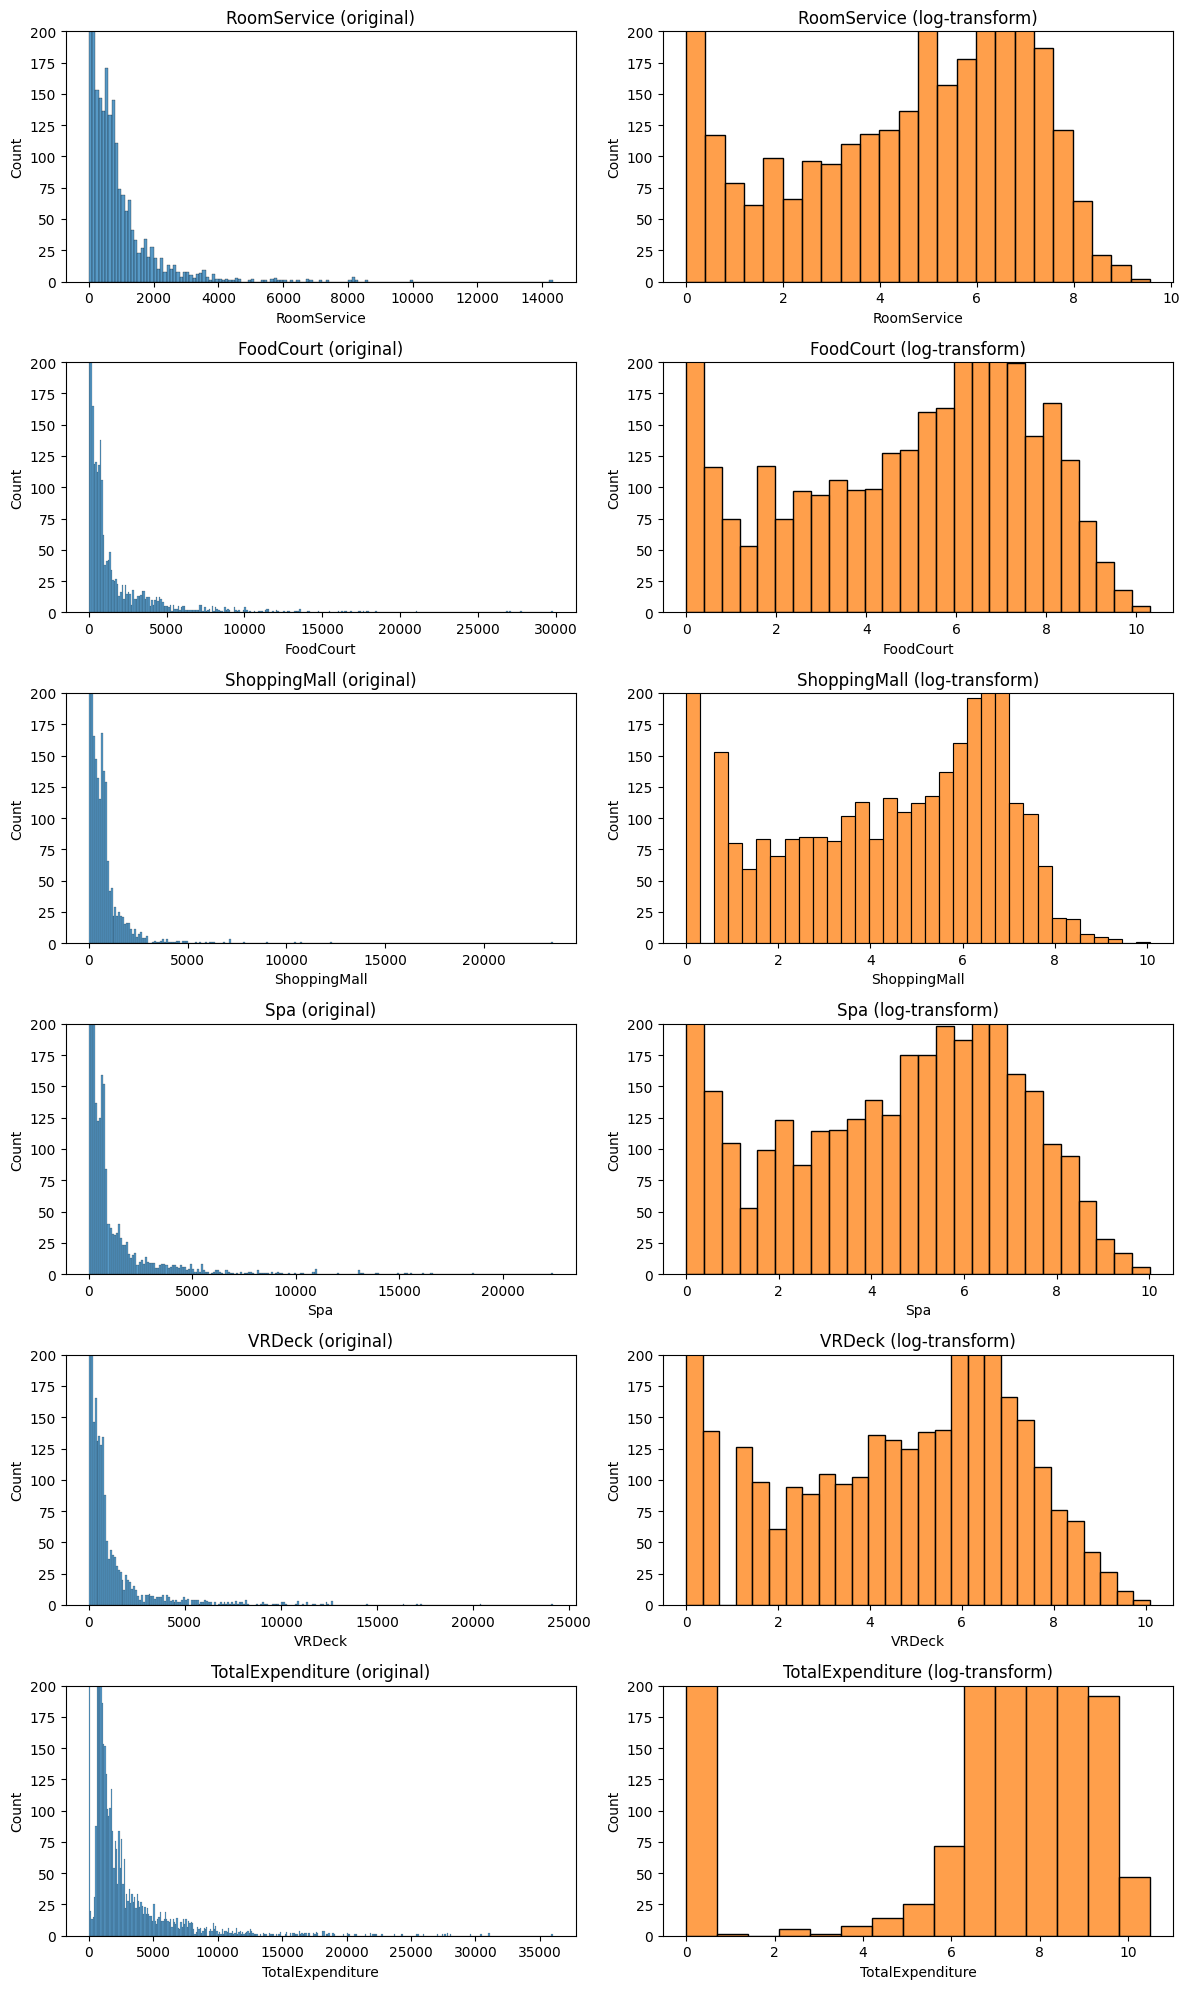

In [192]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalExpenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [205]:
# Apply log transform
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalExpenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

In [206]:
# Encoding and scaling
# We will use column transformers to be more professional. It's also good practice

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Indentify numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)

Training set shape: (8693, 29)


c:\Users\javie\Programacion\GitHub\Spaceship-Kaggle\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros



In [207]:
# Just for fun, let's look at the transformed data in PCA space. 
# This gives a low dimensional representation of the data, which preserves local and global structure.
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color= 1, size=0.1*np.ones(len(X)), opacity = 1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

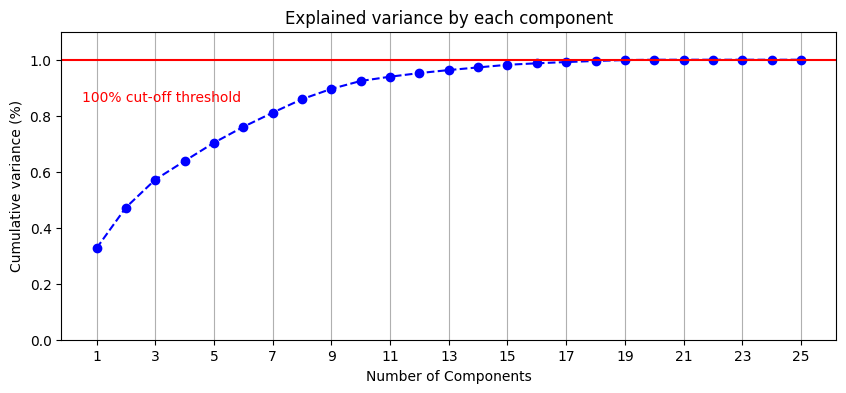

In [81]:
# Explained variance (how important each additional principal component is)
pca = PCA().fit(X)
fig, ax = plt.subplots(figsize=(10,4))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=2))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red')
ax.grid(axis='x')

# Model Selection

In [208]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [209]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X,target_col,stratify=target_col,train_size=0.8,test_size=0.2,random_state=0)

To briefly mention the algorithms we will use,

- Logistic Regression: Unlike linear regression which uses Least Squares, this model uses Maximum Likelihood Estimation to fit a sigmoid-curve on the target variable distribution. The sigmoid/logistic curve is commonly used when the data is questions had binary output.

- K-Nearest Neighbors (KNN): KNN works by selecting the majority class of the k-nearest neighbours, where the metric used is usually Euclidean distance. It is a simple and effective algorithm but can be sensitive by many factors, e.g. the value of k, the preprocessing done to the data and the metric used.

- Support Vector Machine (SVM): SVM finds the optimal hyperplane that seperates the data in the feature space. Predictions are made by looking at which side of the hyperplane the test point lies on. Ordinary SVM assumes the data is linearly separable, which is not always the case. A kernel trick can be used when this assumption fails to transform the data into a higher dimensional space where it is linearly seperable. SVM is a popular algorithm because it is computationally effecient and produces very good results.

- Random Forest (RF): RF is a reliable ensemble of decision trees, which can be used for regression or classification problems. Here, the individual trees are built via bagging (i.e. aggregation of bootstraps which are nothing but multiple train datasets created via sampling with replacement) and split using fewer features. The resulting diverse forest of uncorrelated trees exhibits reduced variance; therefore, is more robust towards change in data and carries its prediction accuracy to new data. It works well with both continuous & categorical data.

- Extreme Gradient Boosting (XGBoost): XGBoost is similar to RF in that it is made up of an ensemble of decision-trees. The difference arises in how those trees as derived; XGboost uses extreme gradient boosting when optimising its objective function. It often produces the best results but is relatively slow compared to other gradient boosting algorithms.

- Light Gradient Boosting Machine (LGBM): LGBM works essentially the same as XGBoost but with a lighter boosting technique. It usually produces similar results to XGBoost but is significantly faster.

- Categorical Boosting (CatBoost): CatBoost is an open source algorithm based on gradient boosted decision trees. It supports numerical, categorical and text features. It works well with heterogeneous data and even relatively small data. Informally, it tries to take the best of both worlds from XGBoost and LGBM.

- Naive Bayes (NB): Naive Bayes learns how to classify samples by using Bayes' Theorem. It uses prior information to 'update' the probability of an event by incoorporateing this information according to Bayes' law. The algorithm is quite fast but a downside is that it assumes the input features are independent, which is not always the case.

In [211]:
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [212]:
# Classifiers
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=0, probability=True),
    "RandomForest" : RandomForestClassifier(random_state=0),
    #"XGBoost" : XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'), # XGBoost takes too long
    "LGBM" : LGBMClassifier(random_state=0),
    "CatBoost" : CatBoostClassifier(random_state=0, verbose=False),
    "NaiveBayes": GaussianNB()
}

# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid,
    "XGBoost" : boosted_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "NaiveBayes": NB_grid
}

In [213]:
import time
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_valid, y_valid)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

c:\Users\javie\Programacion\GitHub\Spaceship-Kaggle\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\javie\Programacion\GitHub\Spaceship-Kaggle\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\javie\Programacion\GitHub\Spaceship-Kaggle\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\j

Model: LogisticRegression
Training time (mins): 0.05

Model: KNN
Training time (mins): 0.01

Model: SVC
Training time (mins): 1.09

Model: RandomForest
Training time (mins): 0.14

[LightGBM] [Info] Number of positive: 3461, number of negative: 3493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1650
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497699 -> initscore=-0.009203
[LightGBM] [Info] Start training from score -0.009203
Model: LGBM
Training time (mins): 0.2

Model: CatBoost
Training time (mins): 2.24

Model: NaiveBayes
Training time (mins): 0.0



In [214]:
# Show results
valid_scores

,Classifer,Validation accuracy,Training time
0,LogisticRegression,0.766532,0.05
1,KNN,0.772858,0.01
2,SVC,0.794710,1.09
3,RandomForest,0.794135,0.14
4,LGBM,0.799885,0.20
5,CatBoost,0.803335,2.24
6,NaiveBayes,0.507763,0.00


In [215]:
# Show best parameters from grid search
clf_best_params

{'LogisticRegression': {'C': 1.25, 'max_iter': 50, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 1},
 'SVC': {'C': 0.75, 'gamma': 'scale', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 10, 'n_estimators': 200},
 'LGBM': {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 50},
 'CatBoost': {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 200},
 'NaiveBayes': {'var_smoothing': 1e-10}}

In [216]:
# Classifiers
best_classifiers = {
    "LGBM" : LGBMClassifier(**clf_best_params["LGBM"], random_state=0),
    "CatBoost" : CatBoostClassifier(**clf_best_params["CatBoost"], verbose=False, random_state=0),
}

In [217]:
# Number of folds in cross validation
FOLDS=10

preds=np.zeros(len(X_test))
for key, classifier in best_classifiers.items():
    start = time.time()
    
    # 10-fold cross validation
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    
    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, target_col)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = target_col[train_idx], target_col[val_idx]

        # Train model
        clf = classifier
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        preds += clf.predict_proba(X_test)[:,1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score=score/FOLDS
    
    # Stop timer
    stop = time.time()

    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# Ensemble predictions
preds=preds/(FOLDS*len(best_classifiers))

[LightGBM] [Info] Number of positive: 3893, number of negative: 3930
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1652
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497635 -> initscore=-0.009459
[LightGBM] [Info] Start training from score -0.009459
[LightGBM] [Info] Number of positive: 3893, number of negative: 3930
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1652
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497635 -> initscore=-0.009459
[LightGBM] [Info] Start training from score -0.009459
[LightGBM] [Info] 

# Post Processing

Text(0.5, 0, 'Probability')

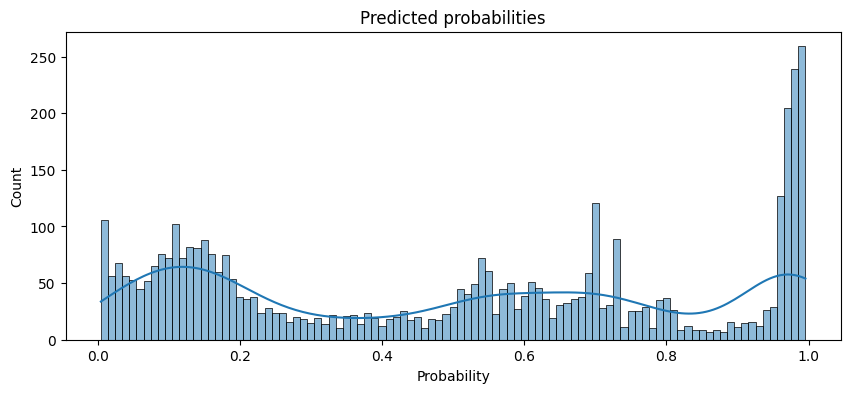

In [218]:
plt.figure(figsize=(10,4))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

Finally, we need to convert each predicted probability into one of the two classes (transported or not). The simplest way is to round each probability to the nearest integer (0 for False or 1 for True). However, assuming the train and test sets have similar distributions, we can tune the classification threshold to obtain a similar proportion of transported/not transported in our predictions as in the train set. Remember that the proportion of transported passengers in the train set was 50.4%.

In [219]:
# Proportion (in test set) we get from rounding
print(np.round(100*np.round(preds).sum()/len(preds),2))

53.68


Our models seem to (potentially) overestimate the number of transported passengers in the test set. Let's try to bring that proportion down a bit.

Optimal threshold: 0.519


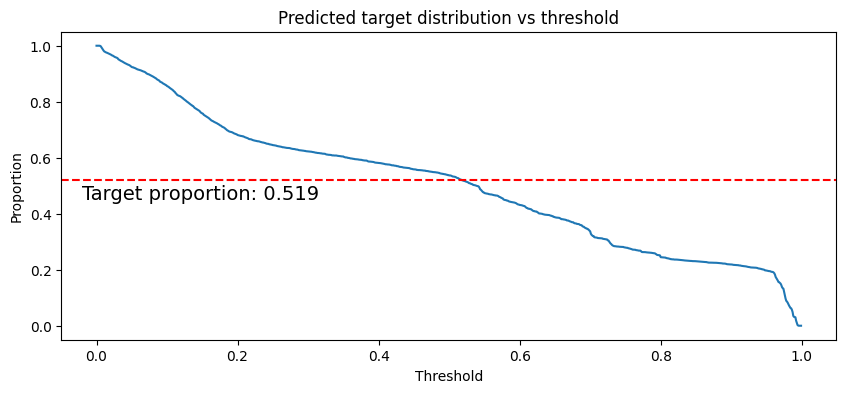

In [220]:
# Proportion of predicted positive (transported) classes
def preds_prop(preds_arr, thresh):
    pred_classes=(preds_arr>=thresh).astype(int)
    return pred_classes.sum()/len(pred_classes)

# Plot proportions across a range of thresholds
def plot_preds_prop(preds_arr):
    # Array of thresholds
    T_array=np.arange(0,1,0.001)
    
    # Calculate proportions
    prop=np.zeros(len(T_array))
    for i, T in enumerate(T_array):
        prop[i]=preds_prop(preds_arr, T)
        
    # Plot proportions
    plt.figure(figsize=(10,4))
    plt.plot(T_array, prop)
    target_prop=0.519         # Experiment with this value
    plt.axhline(y=target_prop, color='r', linestyle='--')
    plt.text(-0.02,0.45,f'Target proportion: {target_prop}', fontsize=14)
    plt.title('Predicted target distribution vs threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion')
    
    # Find optimal threshold (the one that leads to the proportion being closest to target_prop)
    T_opt=T_array[np.abs(prop-target_prop).argmin()]
    print('Optimal threshold:', T_opt)
    return T_opt
    
T_opt=plot_preds_prop(preds)

In [221]:
# Classify test set using optimal threshold
preds_tuned=(preds>=T_opt).astype(int)

C:\Users\javie\AppData\Local\Temp\ipykernel_22292\1555797615.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Text(0.5, 1.0, 'Prediction distribution')

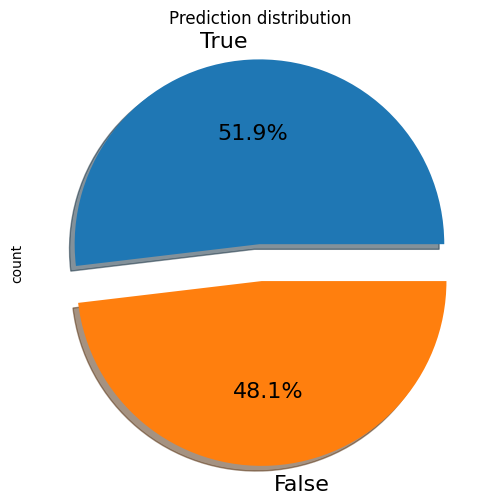

In [223]:
# Sample submission (to get right format)
sub=pd.read_csv('data/sample_submission.csv')

# Add predictions
sub['Transported']=preds_tuned

# Replace 0 to False and 1 to True
sub=sub.replace({0:False, 1:True})

# Prediction distribution
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [224]:
# Output to csv
sub.to_csv('submission.csv', index=False)